In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy 
import os
import keras
import sklearn
%matplotlib inline

Using TensorFlow backend.


In [14]:
train=pd.read_csv("Data/myntra_train_dataset.csv")
train=train[['Brand', 'Category', 'Gender', 'Color','Sub_category']]

In [15]:
train.shape

(70000, 5)

In [16]:
train_img_path='Train_Data/Train/'

In [17]:
train_img_names=os.listdir("Train_Data/Train/")

In [6]:
train_img_names.sort()

In [18]:
len(train_img_names)

69897

In [19]:
from tqdm import tqdm

In [20]:
im_names=[]
for i in tqdm(range(len(train))):
    im_names.append(str(i)+"_"+train['Sub_category'][i]+'.jpg')

100%|██████████| 70000/70000 [00:01<00:00, 38944.69it/s]


In [21]:
train["Image_Names"]=im_names

In [23]:
rows_to_be_del=set(im_names).difference(set(train_img_names))

In [10]:
len(set(im_names).difference(set(train_img_names)))

103

In [12]:
len(train_img_names)

69897

In [13]:
len(im_names)

70000

In [24]:
train.index=im_names

In [15]:
from PIL import Image

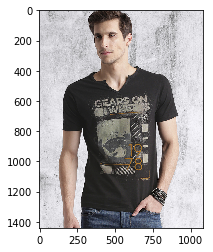

In [16]:
plt.imshow(Image.open(train_img_path+train.index[34]))

In [25]:
train.drop(rows_to_be_del,inplace=True)

In [28]:
train.columns

Index(['Brand', 'Category', 'Gender', 'Color', 'Sub_category', 'Image_Names'], dtype='object')

In [30]:
train=train[['Brand', 'Category', 'Gender', 'Color', 'Image_Names','Sub_category']]

In [31]:
train.to_csv("Cleaned_Train_Data.csv",index=False)

In [19]:
train_img_path

'Train_Data/Train/'


invalid_imgs = []
train_img=[]
for img_name in tqdm(train.index):
    try:
        img=cv2.imread(train_img_path+img_name)
        img=cv2.resize(img,(32,32))
        train_img.append(img)
    except:
        print('*')
        invalid_imgs.append(img_name)     

len(invalid_imgs)

for imgn in tqdm(invalid_imgs): os.remove(train_img_path+imgn)

In [20]:
def img_reader(img_path):
    img=cv2.imread(img_path)
    img=cv2.resize(img,(32,32))
    return(img)

## Image Resizer
def read_img_scipy(img_path):
    img = scipy.misc.imread(img_path)
    img = scipy.misc.imresize(img, (32,32))
    #img = img.astype('float32')
    return (img)

In [21]:
len(os.listdir(train_img_path))

69897

In [22]:
train_img_path

'Train_Data/Train/'

In [23]:
train_img=[]
for img_name in tqdm(train.index):
    img=cv2.imread(train_img_path+img_name)
    img=cv2.resize(img,(64,64))
    train_img.append(img)

100%|██████████| 10000/10000 [07:21<00:00, 22.66it/s]


In [24]:
X_train=np.array(train_img,np.float32)
X_train=X_train/255.0

In [25]:
labels= train['Sub_category'][10000:20000].tolist()

In [26]:
Y_train = {k:v+1 for v,k in enumerate(set(labels))}

In [27]:
y_train = [Y_train[k] for k in labels]

In [28]:
from keras.utils import to_categorical

In [29]:
y_train = to_categorical(y_train)

In [30]:
y_train.shape

(10000, 23)

## Test Data Preprocessing

In [41]:
test=pd.read_csv("Data/myntra_test.csv")

In [42]:
test.head(2)

,Brand,Category,Gender,Color,Link_to_the_image
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...


In [43]:
test=test.iloc[:,:-1]

In [44]:
test_img_path='Test_Data/Test/'

In [45]:
test_img_names=os.listdir(test_img_path)
test_img_names.sort()

In [46]:
len(test_img_names)

14952

In [47]:
test_im_names=[]
for i in tqdm(range(len(test))):
    test_im_names.append(str(i)+".jpg")

100%|██████████| 15000/15000 [00:00<00:00, 543214.50it/s]


In [48]:
test["Image_Names"]=test_im_names

In [49]:
test.head(2)

,Brand,Category,Gender,Color,Image_Names
0,Allen Solly,Tshirts,Men,Red,0.jpg
1,Celio,Tshirts,Men,Yellow,1.jpg


In [52]:
len(set(test_im_names).difference(set(test_img_names)))

48

In [56]:
test.index=test_im_names

In [58]:
test.drop(list(set(test_im_names).difference(set(test_img_names))),inplace=True)

In [59]:
test.shape

(14952, 5)

In [60]:
test.to_csv("Cleaned_Test_Data.csv",index=False)

In [40]:
test_img=[]
for img_name in tqdm(test.index):
    img=cv2.imread(test_img_path+img_name)
    img=cv2.resize(img,(64,64))
    test_img.append(img)

100%|██████████| 14952/14952 [10:25<00:00, 23.91it/s]


In [41]:
X_test=np.array(test_img,np.float32)/255.0

## Modelling

In [42]:
from keras.layers import  Dense,Dropout,BatchNormalization,GlobalAveragePooling2D,SeparableConvolution2D,Flatten,MaxPooling2D
from keras.activations import relu

In [43]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from keras.models import model_from_json

json_file = open("models/model1.json", 'r')
model_1 = json_file.read()
json_file.close()
model_1 = model_from_json(model_1)

model_1.summary()

model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')

model_1.fit(X_train,y_train,batch_size=100,epochs=10,validation_split=0.3,callbacks=[early_stops])

In [45]:
from keras.layers import Convolution2D

In [46]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (64,64,3))) # if you resize the image above, change the shape
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [47]:
mean_img=np.mean(X_train,axis=0)

In [48]:
std_img=np.std(X_train,axis=0)

In [49]:
X_norm_train=(X_train-mean_img)/std_img
X_norm_test=(X_test-mean_img)/std_img

In [50]:
model.fit(X_norm_train, y_train, batch_size=100, epochs=10, validation_split=0.3, callbacks=[early_stops])

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 256s 37ms/step - loss: 2.0526 - acc: 0.3869 - val_loss: 2.0789 - val_acc: 0.4183
Epoch 2/10
7000/7000 [==============================] - 344s 49ms/step - loss: 1.5033 - acc: 0.5906 - val_loss: 1.9209 - val_acc: 0.4890
Epoch 3/10
7000/7000 [==============================] - 266s 38ms/step - loss: 1.3607 - acc: 0.6286 - val_loss: 1.8925 - val_acc: 0.5140
Epoch 4/10
7000/7000 [==============================] - 218s 31ms/step - loss: 1.2447 - acc: 0.6517 - val_loss: 1.8459 - val_acc: 0.5267
Epoch 5/10
7000/7000 [==============================] - 307s 44ms/step - loss: 1.1820 - acc: 0.6641 - val_loss: 1.8441 - val_acc: 0.5080
Epoch 6/10
7000/7000 [==============================] - 287s 41ms/step - loss: 1.1149 - acc: 0.6787 - val_loss: 1.8355 - val_acc: 0.5140
Epoch 7/10
7000/7000 [==============================] - 268s 38ms/step - loss: 1.0665 - acc: 0.6863 - val_loss: 1.8404 - val_acc: 

In [51]:
predictions=model.predict(X_norm_test)

In [52]:
predictions = np.argmax(predictions, axis= 1)

In [53]:
y_maps = dict()
y_maps = {v:k for k, v in Y_train.items()}
pred_labels = [y_maps[k] for k in predictions]

### Submission

In [54]:
#df_test=pd.read_csv("Data/myntra_test.csv")
#df_sub=pd.read_csv("Data/Submission_online.csv")

In [85]:
test.index=test_img_names

In [86]:
df_sub.index=test_im_names

In [87]:
df_sub.head(2)

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0.jpg,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1.jpg,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN


In [89]:
len(test)

14952

In [58]:
test["Sub_category"]=pred_labels

In [60]:
sub = pd.DataFrame({ 'detected':pred_labels})
sub.to_csv('submission.csv', index=False)

In [91]:
df_sub.reset_index(inplace=True)
test.reset_index(inplace=True)
sub_2=df_sub.merge(test,on="index",how='outer',)
sub_2=sub_2[['Brand_x', 'Category_x', 'Gender_x', 'Color_x', 'Link_to_the_image_x',
       'Sub_category_y']]


In [94]:
sub_2.rename(columns={'Brand_x':'Brand',
                      'Category_x':'Category',
                      'Gender_x':'Gender',
                      "Color_x":"Color",
                      "Link_to_the_image_x":"Link_to_the_image",
                      'Sub_category_y':"Sub_category"
                      
    
},inplace=True)
sub_2['Sub_category'].fillna("Solid",inplace=True)
sub_2.to_csv("64_64_10k.csv",index=False)

## Model on Full Data

In [ ]:
"""train_img=[]
for img_name in tqdm(train.index):
    img=cv2.imread(train_img_path+img_name)
    img=cv2.resize(img,(64,64))
    train_img.append(img)
X_train=np.array(train_img,np.float32)
X_train=X_train/255.0"""
labels= train['Sub_category'].tolist()
#class_list = train['detected'].tolist()
Y_train = {k:v+1 for v,k in enumerate(set(labels))}
y_train = [Y_train[k] for k in labels]
y_train = to_categorical(y_train)
early_stops = EarlyStopping(patience=3, monitor='val_acc')

model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (64,64,3))) # if you resize the image above, change the shape
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=100, epochs=30, validation_split=0.3, callbacks=[early_stops])
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis= 1)

y_maps = dict()
y_maps = {v:k for k, v in Y_train.items()}
pred_labels = [y_maps[k] for k in predictions]
sub = pd.DataFrame({'row_id':test_img_names, 'detected':pred_labels})
sub.to_csv('submission_full_64.csv', index=False)

Train on 48927 samples, validate on 20970 samples
Epoch 1/30
48927/48927 [==============================] - 679s 14ms/step - loss: 1.9412 - acc: 0.4583 - val_loss: 1.7038 - val_acc: 0.5175
Epoch 2/30
13500/48927 [=======>......................] - ETA: 6:54 - loss: 1.6596 - acc: 0.5484